# Decision Tree
Date: 16/12/2021

In [19]:
from google.colab import files
uploaded = files.upload()

Saving bill_authentication.csv to bill_authentication (1).csv


In [20]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['bill_authentication.csv']))

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
print(df.shape)
print(df.head())

(1372, 5)
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [23]:
x = df.drop('class', axis=1)
y = df['class']

In [24]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(max_depth=2, random_state=17)
classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xtest)
print('Decision Tree Accuracy: ',accuracy_score(ytest, ypred))

Decision Tree Accuracy:  0.88


In [26]:
pip install pydotplus

In [27]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(classifier, out_file = None, feature_names = xtrain.columns, filled =True, class_names=['class_yes', 'class_no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Create PNG
graph.write_png('graph.png')

True

In [28]:
# To display Decision Tree

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, 'tree.dot')

In [30]:
! dot -Tpng tree.dot -o tree.png

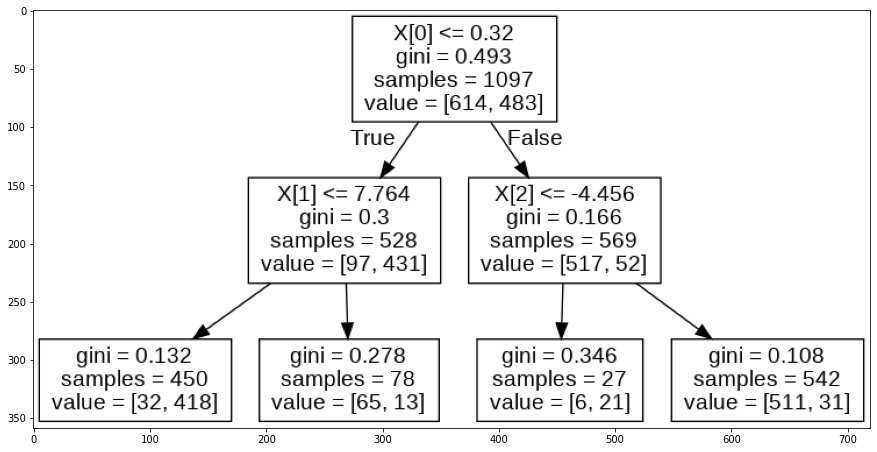

In [31]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (15, 15))
plt.imshow(img)